In [70]:
#!pip install python-louvain
#pip install community
import warnings
warnings.filterwarnings('ignore')

In [71]:
import community
from community import community_louvain
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from pylab import rcParams
import collections
from collections import *
import operator
import powerlaw
import re
import seaborn as sns

import matplotlib.colors as mcolors
rcParams['figure.figsize'] = 20, 15

# Social Network And Text Analysis - Coursework 1
 Candidate Number: 011039 Student Id: 700057465

# 1. Analyze a Network  
## (1.a) Load the Network.
Please load the network form the edge-list file: ia-enron.edges as Gx. This is the edges of an undirected binary
contact network. You can find the file ia-enron.edges on Ele page of the course ECMM447.
Note: The Enron communication network provided for this coursework is a modified version of the dataset
of this paper:: Giang Hoang Nguyen et al. Continuous-Time Dynamic Network Embeddings. WWW ’18:
Companion Proceedings of the The Web Conference 2018 DOI: 10.1145/3184558.3191526


In [3]:
Gx = nx.read_edgelist('ia-enron.edges.txt')
rcParams['figure.figsize'] = 20, 15

## (1.b) Plot the Network Adjacency Matrix

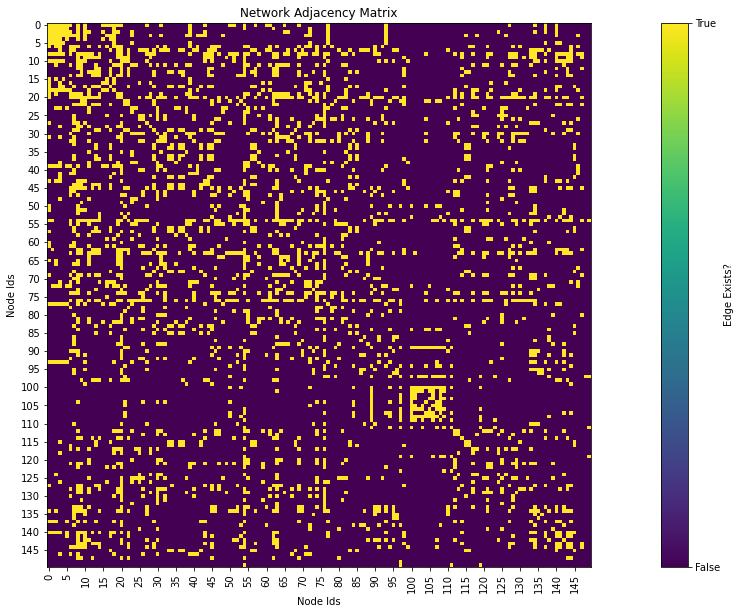

In [4]:
'''
  This function will plot the Adjacency 
  matrix of the graph.
'''
def plotAdjacencyMatrix(G):
    #Get and plot adjacency matrix
    plt.figure(figsize=(25,10))
    plt.xlabel("Node Ids")
    plt.ylabel("Node Ids")
    plt.xticks(range(0,len(G.nodes)+1,5),rotation=90)

    plt.yticks(range(0,len(G.nodes)+1,5))
    plt.imshow(nx.to_numpy_matrix(G))
    plt.title('Network Adjacency Matrix')
    cbar = plt.colorbar(label="Edge Exists?") #--> set the colorbar of the heatmap
    cbar.set_ticks([0,1]) #--> set the range of the color bar
    cbar.ax.set_yticklabels([False, True])
    plt.show()

#plot the graph given above
plotAdjacencyMatrix(Gx)

## (1.c) Plot the Degree distribution

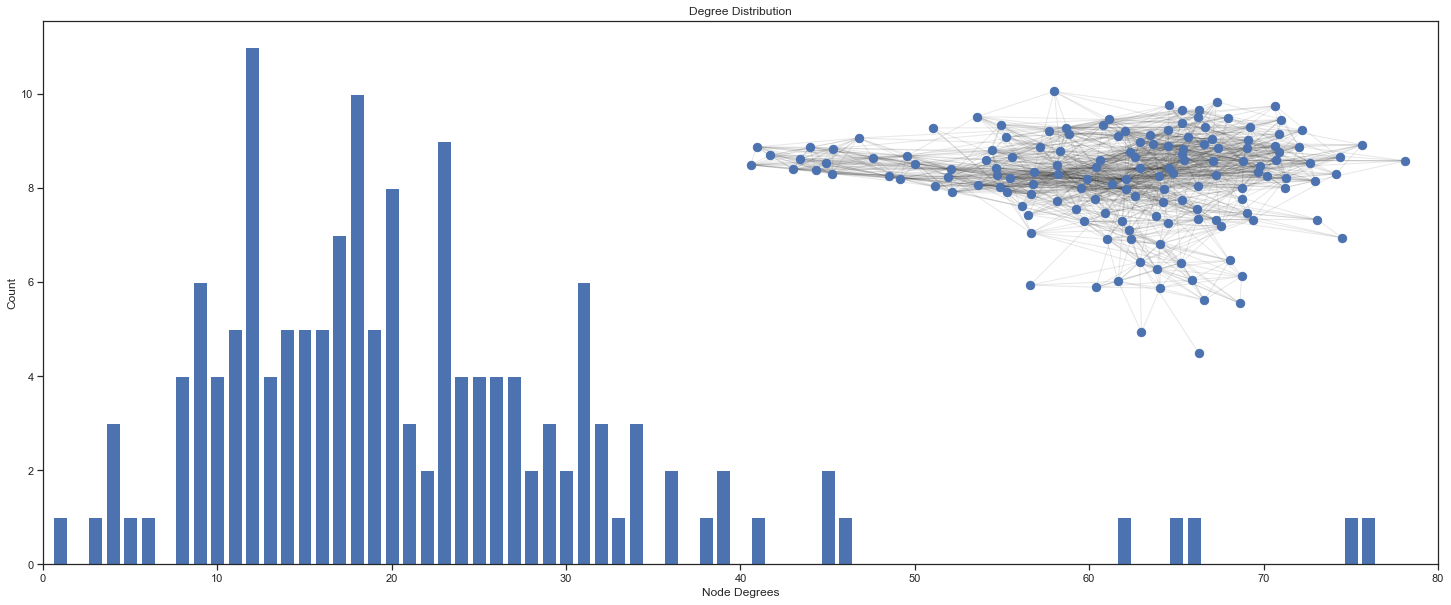

In [127]:
from scipy.interpolate import make_interp_spline, BSpline
'''
  Plot degree distribution 
'''
def drawDegreeDistribution(G):
    degreeDetails = G.degree()
    degree_sequence = sorted([degree for node, degree in G.degree])
    degreeCount = collections.Counter(degree_sequence)
    d, c = zip(*degreeCount.items())
    
    fig , ax = plt.subplots(figsize=(25,10))
    plt.title("Degree Distribution")
    plt.xlabel('Node Degrees')
    plt.ylabel('Count')
    plt.bar(d,c)
    plt.xlim([0,80])
    plt.axes([0.5,0.4,0.4,0.4])
    plt.axis('off')
    
    #Draw network
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,G.nodes,node_size=70,node_color='b')
    nx.draw_networkx_edges(G,pos,G.edges,alpha=0.1)
    plt.show()


drawDegreeDistribution(Gx)

## (1.d) Plot the Degree distribution 2. Test the hypothesis that degree distribution has a lognormal shape.Using the Kolomoropv-Smirnov test can we accept or reject this hypothesis?


Lets plot the histogram of degree distribution has lognormal shape. By binning the data, We can see that plot follows lognormal shape.



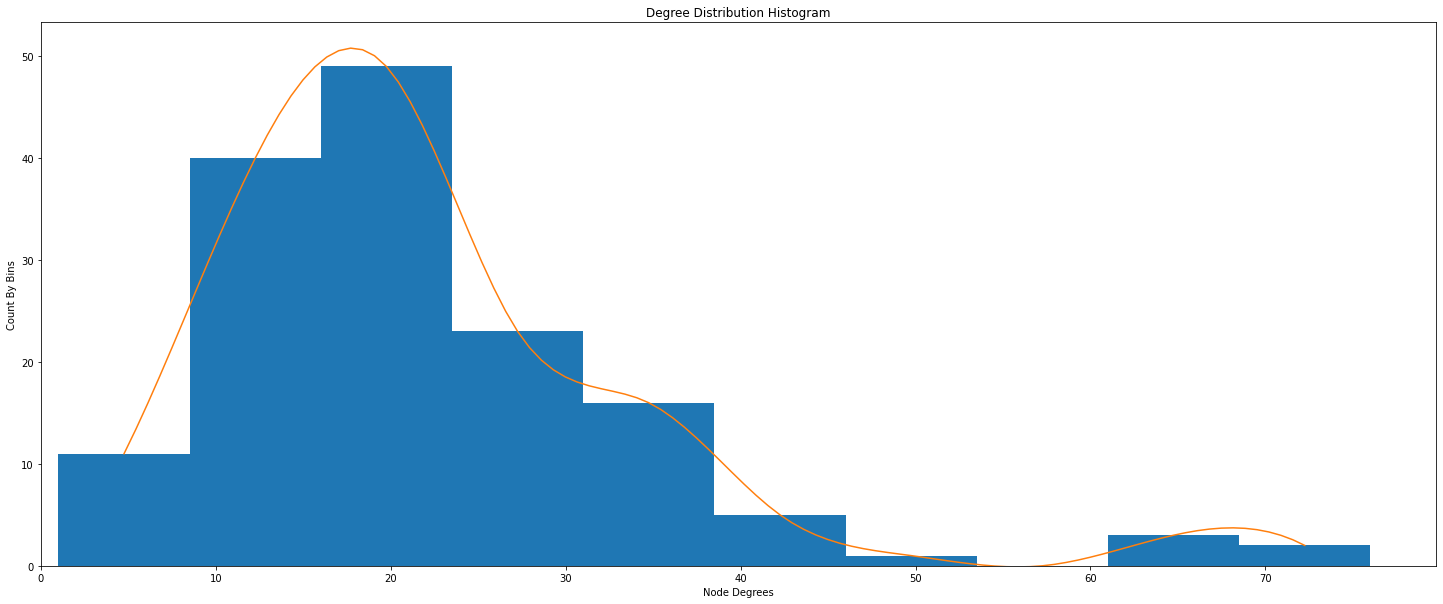

In [6]:
from scipy.interpolate import make_interp_spline, BSpline
'''
  Plot degree distribution as histogram 
  with binning logic and smoothening curve to understand
  distribution
'''
def drawDegreehistogram(G):
    degree_sequence = sorted([degree for node, degree in G.degree])
    degreeCount = collections.Counter(degree_sequence)
    d, c = zip(*degreeCount.items())
    fig , ax = plt.subplots(figsize=(25,10))
    
    #This is plotted with binning
    n,d,p = plt.hist(d,weights=c)
    #plot with smothend curve
    d = [d[i]+(d[i+1]-d[i])/2 for i in range(len(d)-1)] 
    xnew = np.linspace(d[0], d[-1], 100) 
    spl = make_interp_spline(d, n, k =3)
    y_smooth = spl(xnew)
    plt.plot(xnew,y_smooth)
    plt.title("Degree Distribution Histogram")
    plt.ylim(0)
    plt.xlim(0)
    plt.xlabel("Node Degrees")
    plt.ylabel("Count By Bins")
    plt.show()

drawDegreehistogram(Gx)

**Now lets test the Hypothesis that degree distribution has lognormal shape**

* Null Hypothesis (Ho): Degree Distribution has lognormal shape;
* Test statistics: Kolomoropv-Smirnov test;
* P-value: The probability of finding the degree distribution of having lognormal distribution;


In [7]:
from scipy.stats import lognorm, kstest
deg = list(dict(Gx.degree()).values())
sigma, loc, scale = lognorm.fit(deg, floc=0)
mu = np.log(scale)
print("mu    = %9.5f" % mu)
print("sigma = %9.5f" % sigma)
stat, p = kstest(deg, 'lognorm', args=(sigma, 0, scale))
print("p value is: ", p)

mu    =   2.90258
sigma =   0.60948
p value is:  0.2594639103468688


Our p-value is significantly high compared to the standard scale of 0.05.
Having a p-value > 0.05 leads us towards initial null hypothesis. In other words the probability of finding the  degree distribution of having lognormal distribution is more likely. This test concludes that our **null hypothesis cannot be rejected.**

We can also see from below degreee distribution histogram that shape of the degree distributioon resembles the lognormal shape.

## (1.e) Is the Network you are analyzing Assortative or Disassortative?
Please explain your answer. (Using a plot or mathematical evaluation).

We can analyze the network assortativity and disassortativity in two ways:  

*   **Degree Assortativity Coefficient(r)**
    This parameter gives information about whether the Network is assortative or not.
    Also, we know that if r > 0, then Network is assortative from the mathematical evaluation procedure.
    From the below calculation, we are getting the r = -0.045. So Network is not Assortative. Also, here negative r means more nodes with higher degrees are connected with nodes of lower degrees and vice versa compared to the connections between the same degree of nodes; this suggests that Network here is Disassortitative.

* **Scatter plot between the degrees of nodes**
    In the plot, we see that the points are not concentrated towards lower and higher degrees. Instead, it spreads across the whole plot, which visually shows us that the nodes with the same degrees are not connected with the same degree of nodes.  We can also see that the lower degree nodes are connected with higher degrees nodes and vice versa. Hence visualizatioon technique also suggests us that athe Network here is Disassortitative.
   



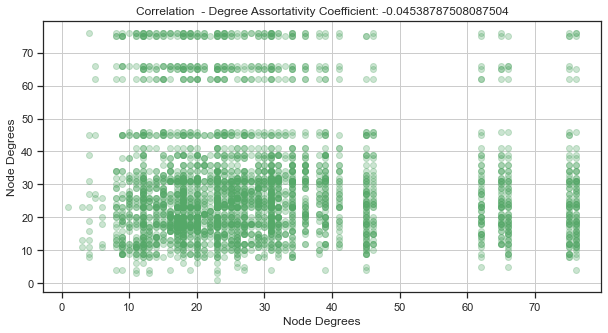

In [23]:
'''
This function is to check the degree correlation of the grpah
It also prints the Assortative cofficient to say the assortative or dissortative
network
'''
def plotDegreeCorrelationWithAssortativityCoefficient(G):
    rcParams['figure.figsize'] = 10, 5
    pos = nx.spring_layout(G)
    x = []
    y = []
    for i,j in G.edges:
      x.append(G.degree(i)),y.append(G.degree(j))
      x.append(G.degree(j)),y.append(G.degree(i))
    plt.title('Correlation  - Degree Assortativity Coefficient: '+str(nx.degree_assortativity_coefficient(G)))
    plt.scatter(x,y,c='g',alpha=0.3)
    plt.grid()
    plt.xlabel('Node Degrees')
    plt.ylabel('Node Degrees')
    plt.show()
    
plotDegreeCorrelationWithAssortativityCoefficient(Gx)

## (1.f) Fitting.
Plot the PDF and CCDF of the degree distribution as a power law, using the powerlaw package we saw during
the lecture and the lab session of ECMM447.

Calculating best minimal value for power law fit


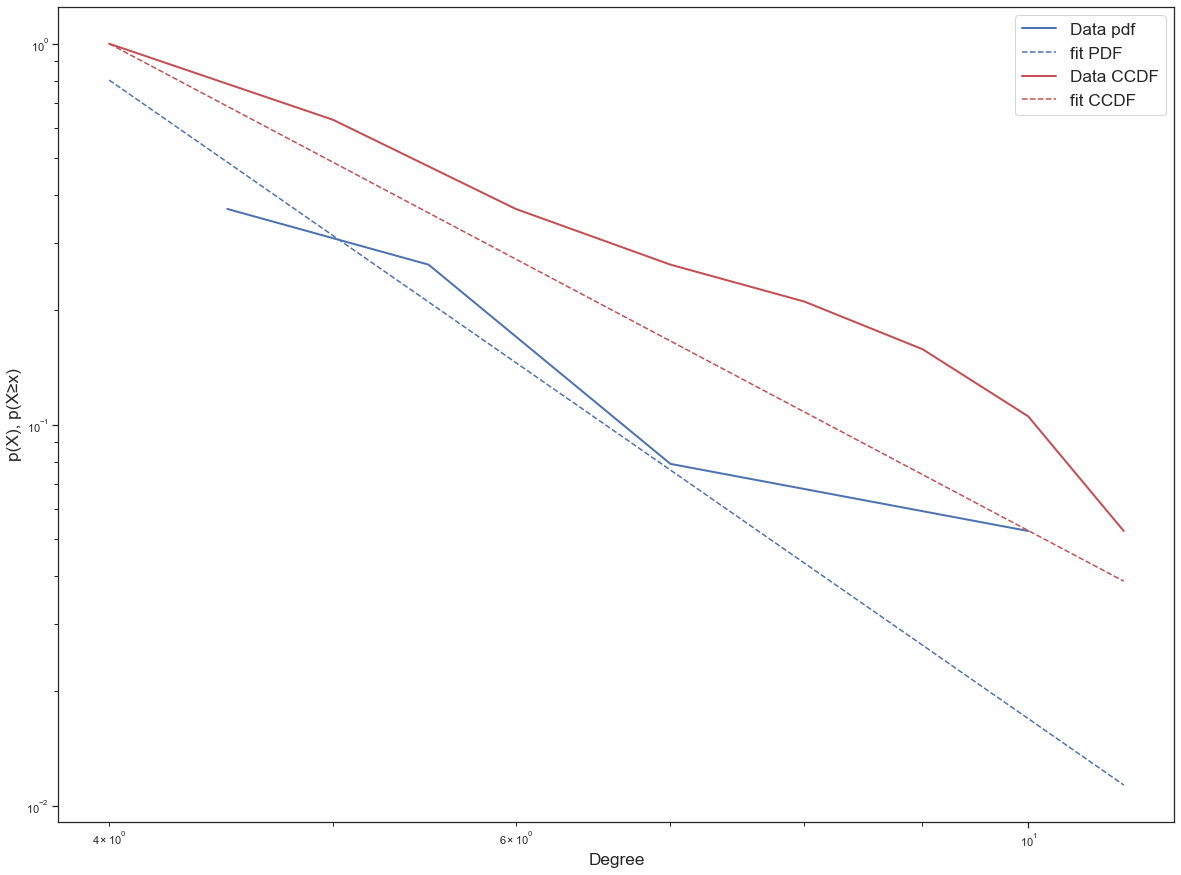

In [116]:
'''
    Function is used to plot the Probability Density Function (PDF) and the Complement Cummulative
    Density Function. This also comapres between them
'''
def Plot_pdf_CCDF(Data, xlabel, ylabel):
    # Fit the data
    fit = powerlaw.Fit(Data) 
    # Plot the PDF of the original data
    fig2=fit.plot_pdf(color='b', linewidth=2) 
    #Plot the PDF of the power law fit
    fit.power_law.plot_pdf(color='b', linestyle='dashed', ax=fig2) 
    # Plot the PDF of the original data in the same fig
    fit.plot_ccdf(color='r', linewidth=2, ax=fig2) 
    # Plot the PDF of the power law fit
    fit.power_law.plot_ccdf(color='r', linestyle='dashed', ax=fig2) 
    plt.legend(['Data pdf', 'fit PDF', 'Data CCDF', 'fit CCDF'], fontsize = 'x-large')
    plt.xlabel(xlabel, fontsize = 'x-large')
    plt.ylabel(ylabel, fontsize = 'x-large')
    plt.show()
    
#Preparing the data to plot the pdf and ccdf
degree_sequence = sorted([degree for node, degree in Gx.degree], reverse=True)
degreeCount = collections.Counter(degree_sequence)
Plot_pdf_CCDF(list(degreeCount.values()), 'Degree', 'p(X), p(X≥x)')


# 2. Centrality and Community Detection

## (2.a) Centralities.
Explain the degree centrality, and the eigenvector centrality. What are the differences between the two? Provide
one practical example for the degree centrality and one for the eigenvector centrality. When is useful to apply
each of two metrics. Explain your answers

**Degree centrality** for a node simply its degree. The degree of a node is the number of edges that it has. The basic intuition is that nodes with more connections are more influential and important in a network. A node with 10 social connections would have a degree centrality of 10. A node with 1 edge would have a degree centrality of 1.**Degree Centrality is useful** when determining which node is the most central in terms of its degree of influence; in other words, the person with higher friend count in a social network, the more cited paper (in-degree) in a scientific citation network is the one that is more central according to this metric.

**The Eigenvector centrality** measures the importance of a node based on the importance of its neighbours. Eigenvector centrality allows for connections to have a variable value so that connecting to some vertices has more benefit than connecting to others. **The PageRank algorithm used by Google's search engine is a variant of Eigenvector Centrality**, primarily used for directed networks. PageRank considers 

  *  The number of inbound links (i.e., sites that link to your site), 
  *  The quality of the linkers (i.e., the PageRank of sites that link to your site)
  *  The link propensity of the linkers (i.e., the number of sites the linkers link to)

The degree centrality helps to find the most connected node or person. In contrast, Eigenvector centrality helps to find the most influential node or node connected to the most number of highly connected nodes.

I have also provided the plot for Degree centrality and Eigenvector centrality for visualization purpose.

In [73]:
'''
  Function used to plot the Grapgh according to different centrality measures 
  layouts and order of size.
  This generic function is used in many places
'''
def plotCentralityData(Gx, measures, measure_name, alpha, pos=None, order=10000 ):
    plt.figure(figsize=(20,18))
    if pos == None:
        print('setting pos')
        pos = nx.spring_layout(Gx, scale=3)
    measures = dict(sorted(measures.items(), key=lambda kv: kv[1]))
      # Draw network nodes with positionm color map, different color and size
    nodes  = nx.draw_networkx_nodes(Gx, pos, node_size=[v * order for v in measures.values()], cmap=plt.cm.plasma, 
                                    node_color=list(measures.values()),
                                    nodelist=list(measures.keys()),node_shape='o') 

    #Setting the color map of the nodes in a symmetric logaritmic normalized scale
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    #setting node labels    
    labels = nx.draw_networkx_labels(Gx, pos, font_color='green')
    nodes.set_edgecolor('r')
    # edges settings 
    edges = nx.draw_networkx_edges(Gx, pos,alpha=0.2) 

    plt.title(measure_name,fontsize='x-large') 
    cbar = plt.colorbar(nodes) 
    #Set the label of the color bar and rotate it
    cbar.set_label('Weight', rotation=270) 
    #Remove the axis of the network plot    
    plt.axis('off')
    plt.show()


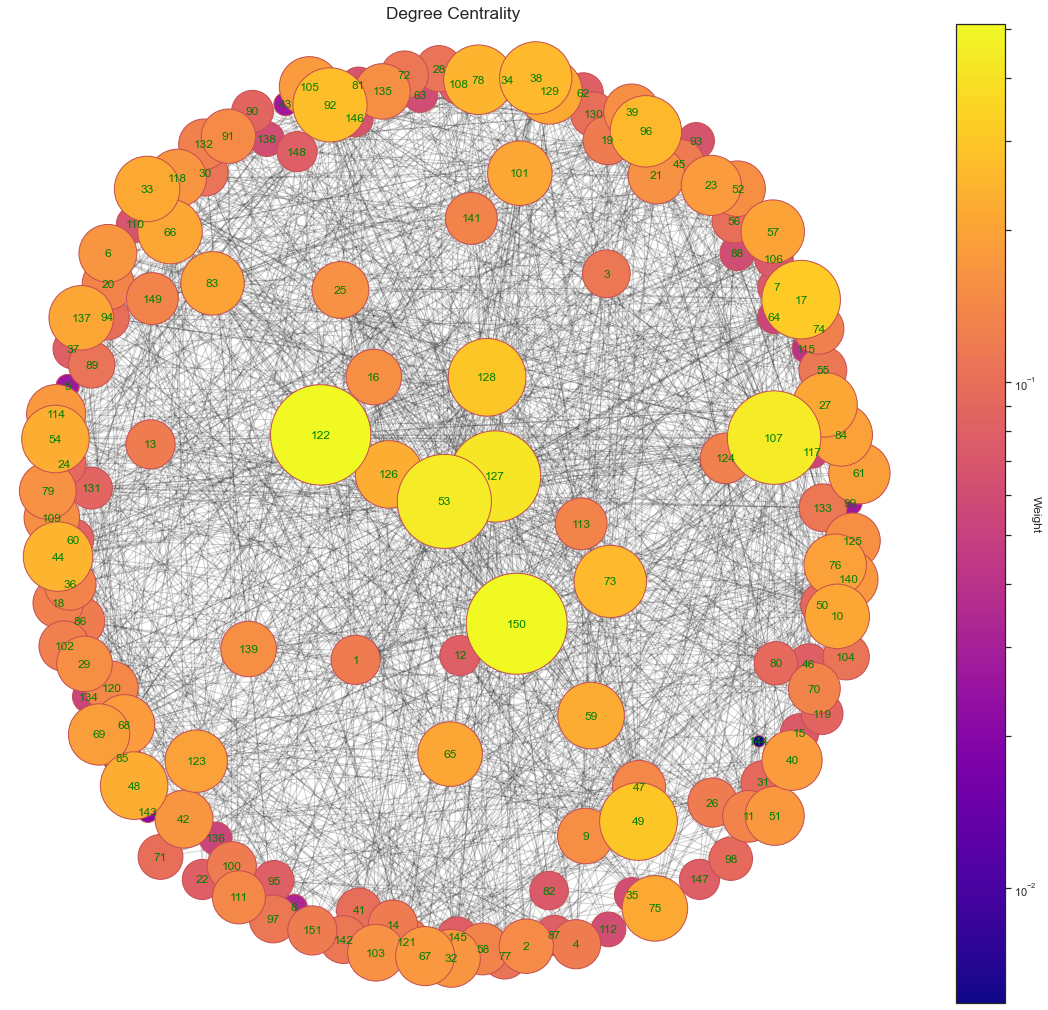

In [74]:
d = nx.degree_centrality(Gx)
plotCentralityData(Gx,d, 'Degree Centrality',0.3,nx.spring_layout(Gx,k=3,iterations=60),20000)

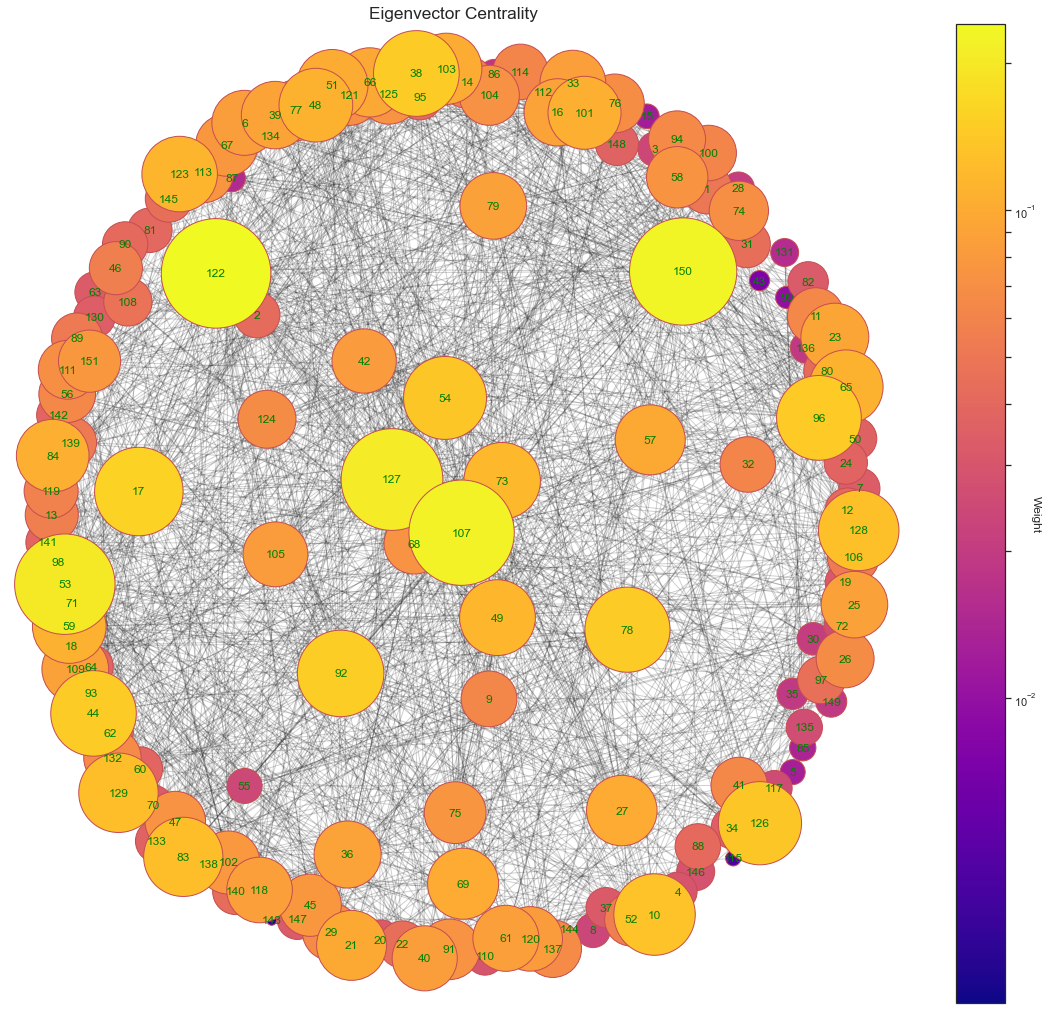

In [75]:

ec = nx.eigenvector_centrality(Gx)
plotCentralityData(Gx,ec, 'Eigenvector Centrality',0.3,nx.spring_layout(Gx,k=4,iterations=80),order=50000)

## (2.b.i) Closeness Centrality.
Create the function centrality_closeness(), that inputs the network and returns the closeness centrality of
each node. (Do not use the function closeness_centrality built in networkx or other python packages, you
have to code it by yourself.)

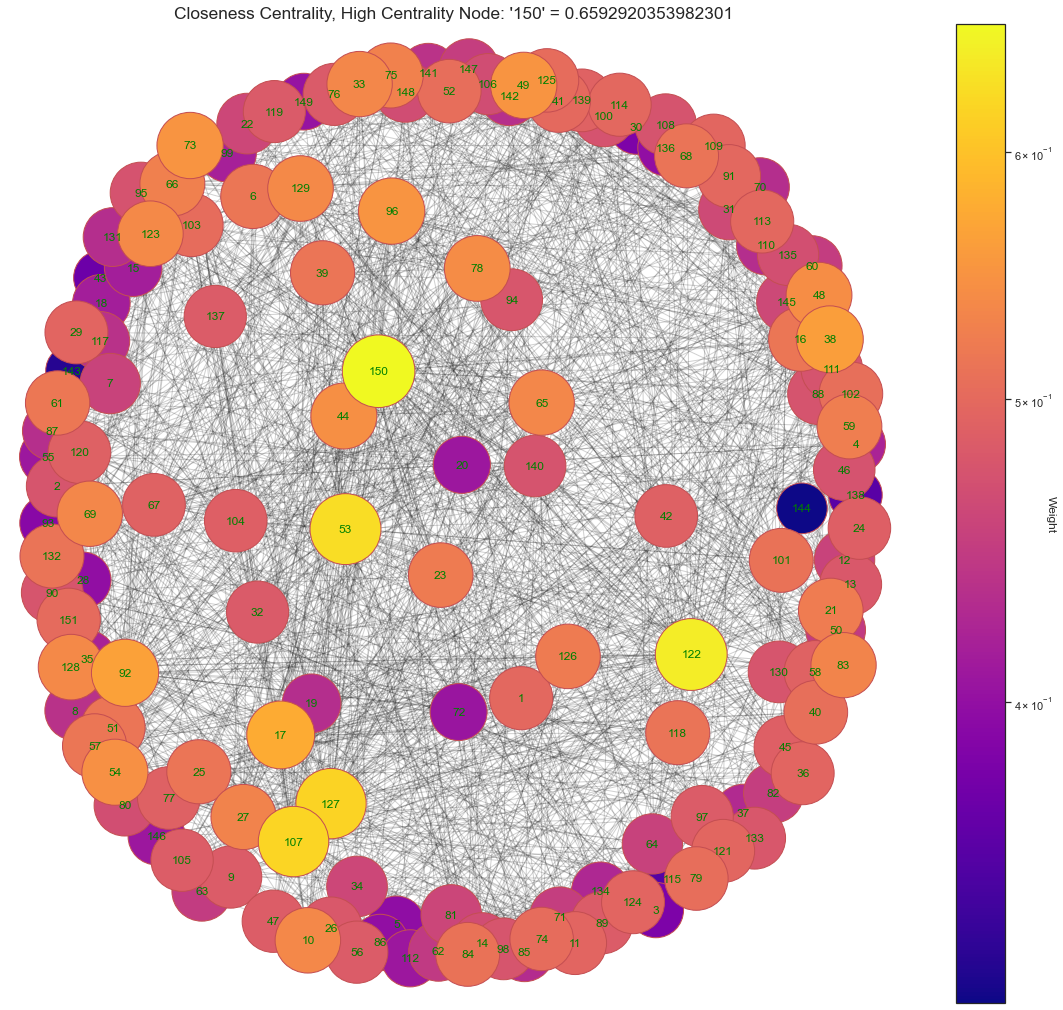

Highest Closeness Centrality Nodes In Decending Order:
['150', '122', '53', '107', '127', '17', '92', '38', '49', '96', '73', '54', '44', '48', '78', '129', '128', '123', '10', '69', '33', '65', '83', '27', '75', '66', '59', '21', '126', '23', '61', '57', '16', '6', '39', '25', '51', '118', '132', '68', '101', '84', '40', '102', '52', '79', '125', '74', '103', '151', '41', '114', '91', '1', '113', '121', '109', '29', '11', '124', '36', '67', '139', '58', '77', '42', '120', '45', '104', '24', '47', '105', '137', '89', '56', '9', '97', '76', '32', '119', '13', '26', '133', '94', '2', '90', '130', '98', '88', '111', '108', '140', '100', '95', '46', '135', '80', '148', '106', '14', '31', '145', '34', '22', '81', '7', '12', '64', '147', '71', '82', '60', '63', '50', '62', '141', '117', '8', '142', '87', '19', '110', '70', '131', '85', '37', '134', '4', '35', '99', '18', '15', '20', '146', '55', '112', '72', '149', '136', '28', '86', '5', '93', '3', '30', '43', '138', '115', '143', '144']


In [117]:
'''
This is to generate the closness centrality 
for any graph
'''
def closeness_centrality(G):     
    path_length = nx.single_source_shortest_path_length
    closeness_centrality = {}
    for n in G.nodes(): 
        paths = path_length(G,n) 
        total_paths = sum(paths.values()) 
        if total_paths > 0.0 and len(G) > 1: 
            closeness_centrality[n] = (len(paths)-1.0) / total_paths 
            s = (len(paths)-1.0) / ( len(G) - 1 ) 
            closeness_centrality[n] *= s 
        else: 
            closeness_centrality[n] = 0.0
    return closeness_centrality 

cd = closeness_centrality(Gx)
#Plot closeness centrality to visualize
highest_closness_nodes = list(dict(sorted(cd.items(), key=lambda kv: kv[1],reverse=True)).keys())
plotCentralityData(Gx,cd, 'Closeness Centrality, High Centrality Node: \''+highest_closness_nodes[0]+'\' = '+str(cd.get(highest_closness_nodes[0])),0.3,nx.spring_layout(Gx,k=3,iterations=60),order=8000)
print('Highest Closeness Centrality Nodes In Decending Order:')
print(highest_closness_nodes)

## (2.b.ii) Comparison Centralities.
Using the network Gx, compare the result of your metrics centrality_closeness() with the eigenvector centrality, with a scatter plot on the x closeness centrality measure and y the eigenvector centrality one. Is there any correlation? Why?

Below scatter plot between the closeness centrality and eigenvector centrality shows the positive correlation between them. That means high closeness centrality nodes also have high eigenvector centrality.

Let’s see how the Eigenvector and closeness centralities are defined to understand the correlation in a better way: 

*   **Eigenvector centrality** This assigns scores to all nodes in the network that indicate the importance of a node in a graph. For example, a node with 300 relatively unpopular friends on Facebook would have lower eigenvector centrality than someone with 300 trendy friends (like Barack Obama). It is sometimes used to measure a node’s influence in the network.

*   **Closeness centrality** is the inverse of the sum of all shortest paths to other vertices. So Closeness can be regarded as a measure of how fast it will spread information to all other nodes. 

If a node has strong closeness centrality, it is positioned, with its relationships, to spread information quickly. These people (if nodes are people in the graph) can be important influencers of the network with high eigenvector centralities.
The below correlation plot also confirms the Eigenvector centrality and closeness centrality has a high correlation. This says that a node with high closeness centrality is also a highly influential node in the network. If we consider very famous personalities like Mark Zuckerberg, they will naturally have high eigenvector centrality. They will also be connected to the other famous and well-connected influential persons who will have huge connections. This also proves that there is a significant possibility that high Eigen centralities may have high closeness centrality. Contrastly, if we consider an average random person, he may not have a higher connection, and also, he may not have the capacity to influence many people. Consequently, they will have much less eigenvector and closeness centrality.
   

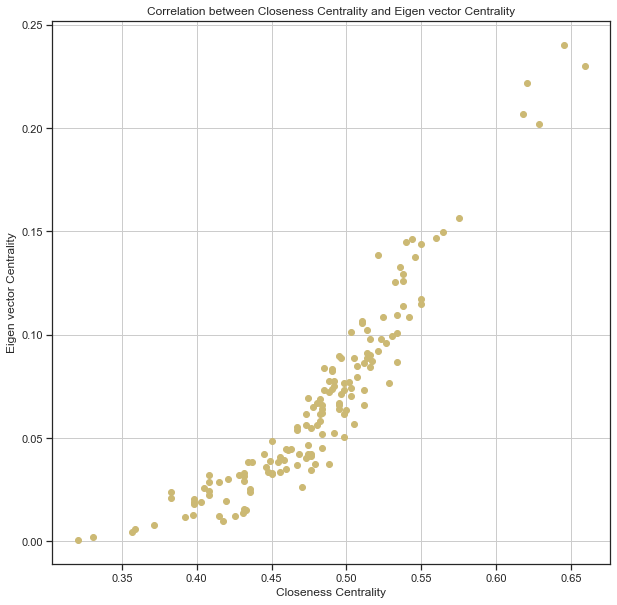

In [77]:
'''
function to plot and compare different centralities
'''
def compareCentralities(m1,m2,m1label,m2label):
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.scatter(m1.values(),m2.values(),color='y')
    plt.xlabel(m1label)
    plt.ylabel(m2label)
    plt.title('Correlation between '+m1label+' and '+m2label)
    plt.show()
#Compare closeness with Eigenvector centrality
compareCentralities(nx.closeness_centrality(Gx),nx.eigenvector_centrality(Gx),'Closeness Centrality','Eigen vector Centrality')    

## (2.c) Centrality Measure.
Please consider now the network Gx loaded in question 1.a.. Imagine that Gx is now representing a social
network, similar to Facebook, Instagram or WeChat. You have to advertise a product and you have budget to
hire only one influencer (i.e. a node in the network Gx). Using the metrics within the centrality metrics we saw
during the lectures ECMM447 and the Labs, suggest the influencer you will hire (as Node id). Explain your
decision.

We see that node 122 has the highest Eigenvector centrality in the below network. We know that high eigenvector centrality means the highly influential power of the node in the network. So node 122 is the most influential nodes in the network. Since our basic aim was to hire an influential person who can influence the social network, **we can consider node 122 as suitable for this job. Hiring this person will help us easily influence the other nodes in the network and help us make our product reach the highest number of nodes or people**.

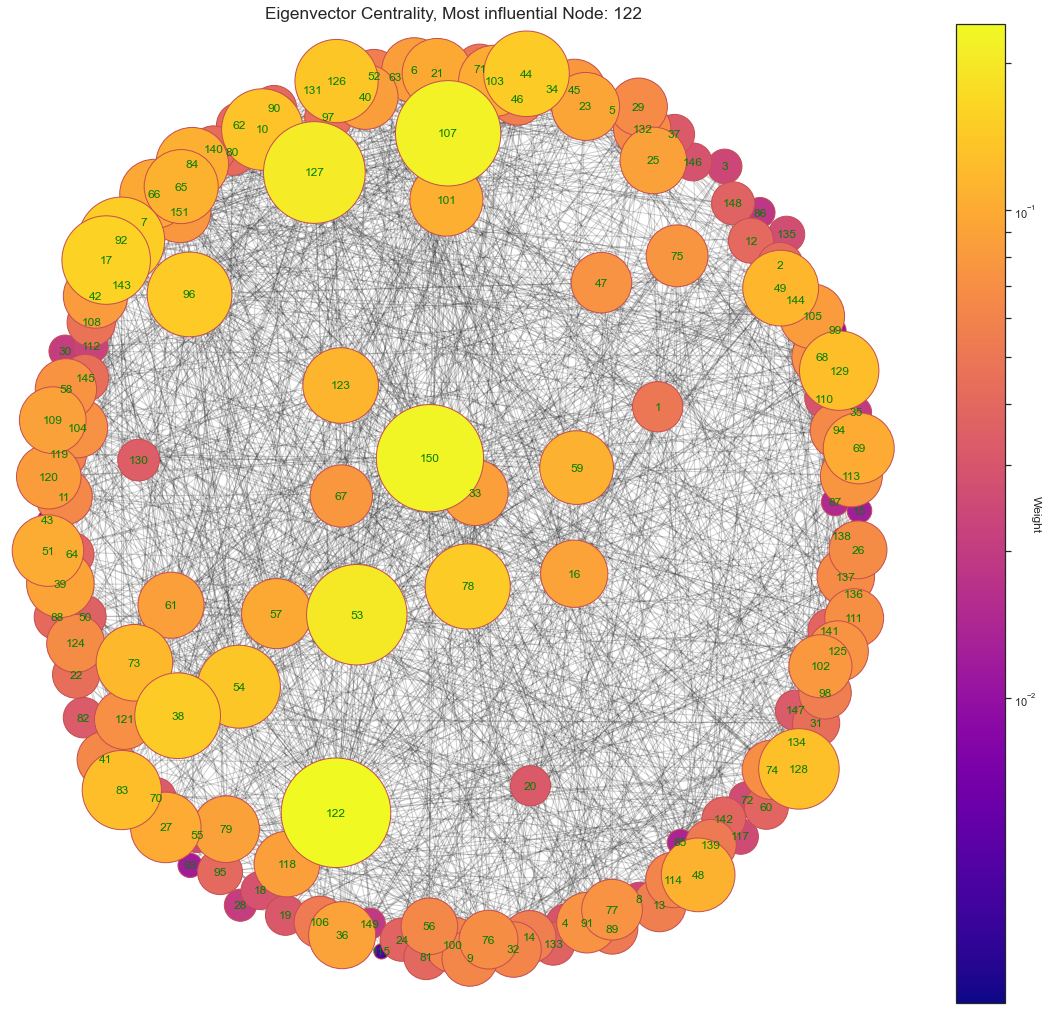

In [78]:
ec = nx.eigenvector_centrality(Gx)
highest_eigenvector_node = list(dict(sorted(ec.items(), key=lambda kv: kv[1],reverse=True)).keys())[0]
plotCentralityData(Gx,ec, 'Eigenvector Centrality, Most influential Node: '+highest_eigenvector_node,0.3,nx.spring_layout(Gx,k=4,iterations=80),order=50000)

## (2.d) Influencer.
Define a function Draw_ego_network that inputs a network G (a networkx network), a network layout (as
list of nodes position), and a node id and the maximum distance of interaction (as int). The function
Draw_ego_network will output the network plot of G outlining (with a different color and bigger size) the
node selected, and the ego network of the node id coloring in different colors the links and the nodes depending
on the interaction distance.
Test your function with the network Gx, the node id of the influencer selected in the question 2.c, a network
layout of your choice (that will improve the readability of the plot) and interaction distance 2. (See the expected
output at the end.)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


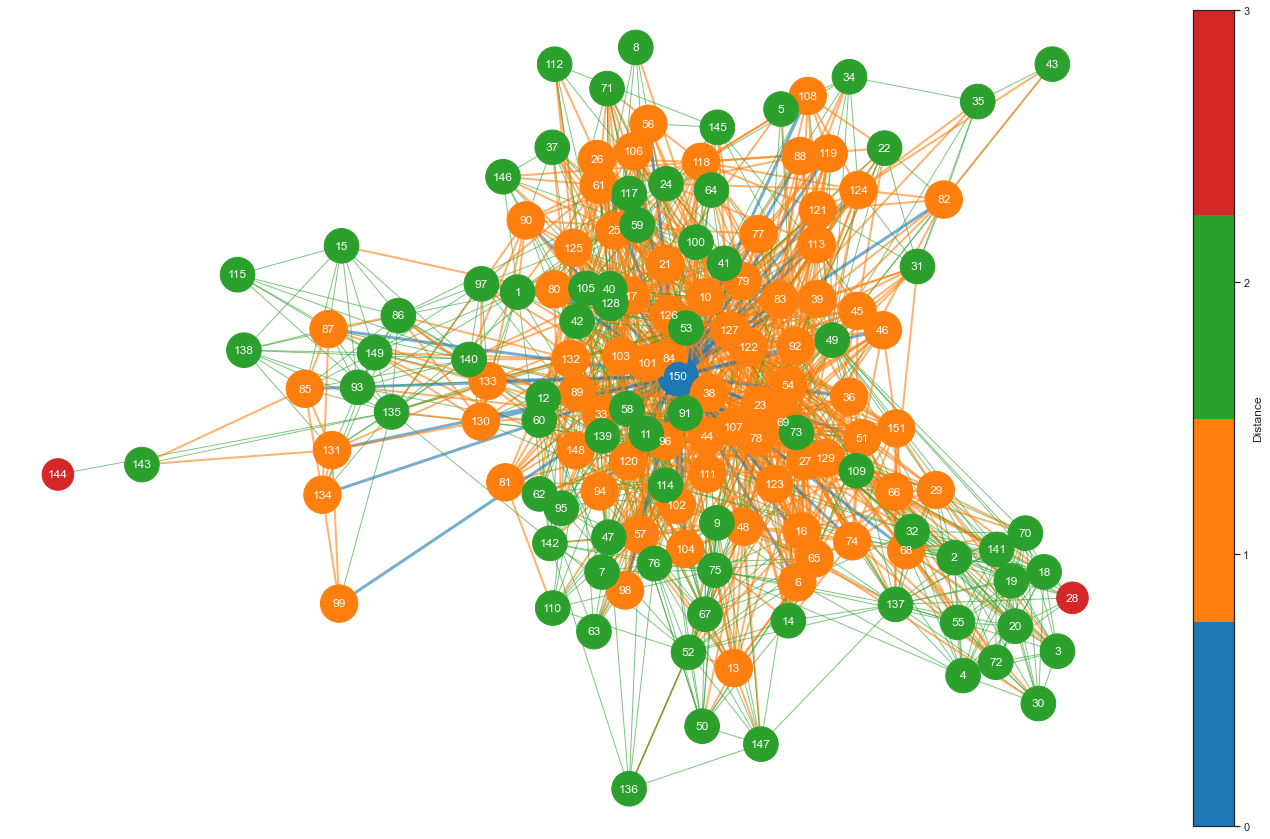

In [79]:
import random
def Draw_ego_network1(G, node_id, max_inter_dist):
    plt.figure(figsize=(25,15))
    length=dict(nx.all_pairs_shortest_path_length(G,cutoff=max_inter_dist))
    measures= length[node_id]
    nodesize = np.fabs(np.array(list(measures.values()))-8)*200
    clusters = np.array(list(set(measures.values())))
    pos = nx.spring_layout(G)
    #draw network nodes
    nodes = nx.draw_networkx_nodes(G,pos, cmap=mcolors.ListedColormap(plt.cm.tab10(clusters)),node_size=nodesize, node_color=list(measures.values()), nodelist=list(measures.keys()))
    cb = plt.colorbar(nodes,ticks=clusters,label='Distance')
    #draw network nedges
    for i in G.edges:
        if measures.get(i[0]) != None and measures.get(i[1]) != None: 
            nx.draw_networkx_edges(G, pos, edgelist=[i],width=(max_inter_dist-measures.get(i[0])), edge_color=plt.cm.tab10(clusters)[measures.get(i[0])],alpha=0.6)
    # Draw ego node as large 
    nx.draw_networkx_nodes(G, pos, nodelist=[node_id],node_color=plt.cm.tab10(clusters)[measures.get(node_id)], node_size=800)
    nx.draw_networkx_labels(G,pos,font_color='w')
    plt.axis('off')
    plt.show()

Draw_ego_network1(Gx,'150',3)

## (2.e) Community Detection and Centrality.
Decide and declare a community algorithm of your choice among the ones we saw during the lectures. Plot
the network with its communities. Plot the adjacency matrix of the network rearranged in order to outline the
communities.

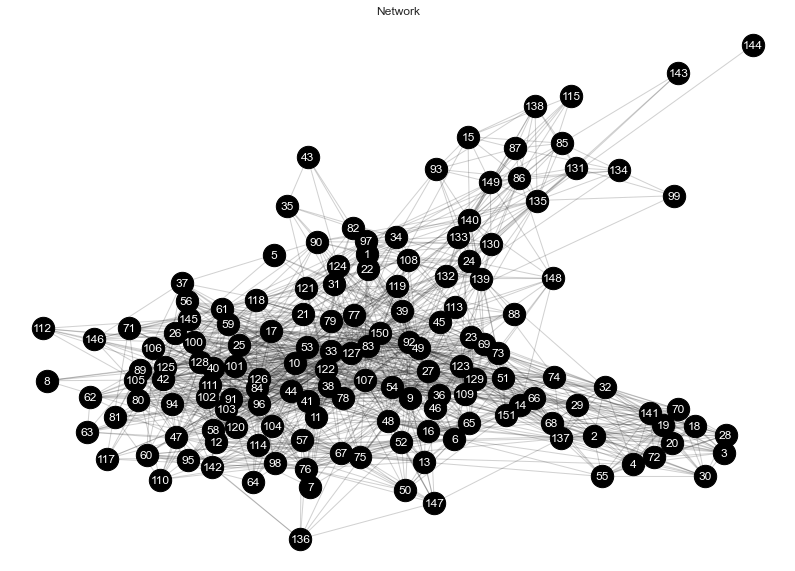

<Figure size 720x360 with 0 Axes>

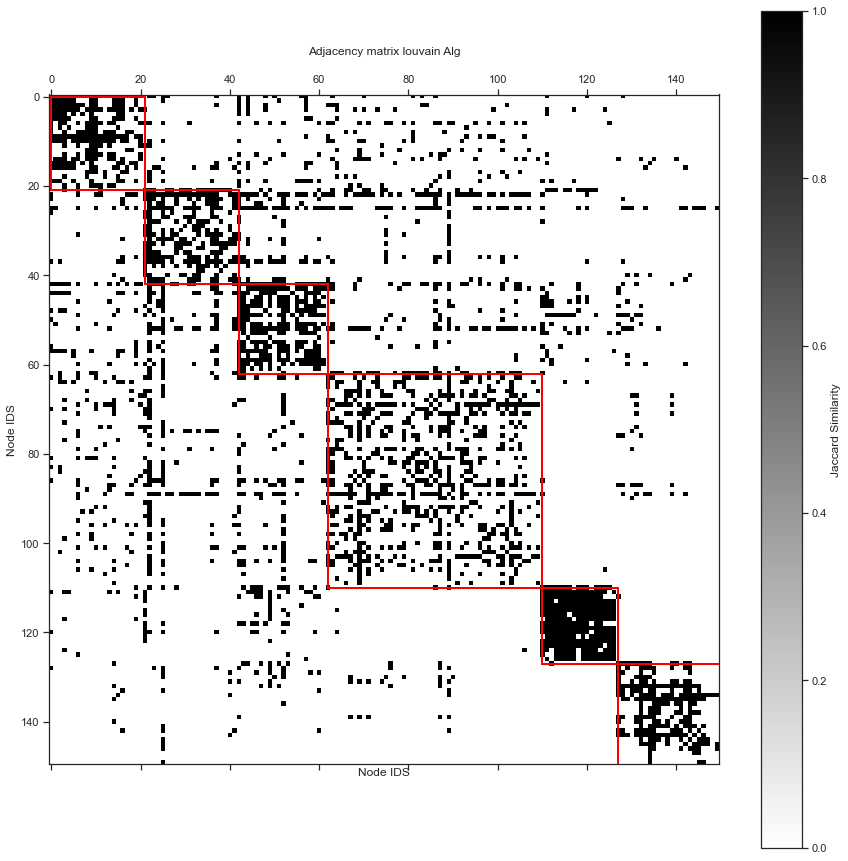

In [158]:
'''
Draw adjacency matrix to outline community

'''
def drawCommunity(G):
    #Find the best partition community
    part = community.best_partition(G)
    order_vector = []
    for ke, va in (Counter(part.values())).items():
        order_vector.append([ke, va])
    order_vector = sorted(order_vector, key=operator.itemgetter(1), reverse=True)
    new_ord = [ke[0] for ke in order_vector]
    part2 = {}
    for ke, va in part.items():
        part2[ke] = new_ord.index(va)
    louvain_comms = defaultdict(list)
    for node_index, comm_id in part2.items():
        louvain_comms[comm_id].append(node_index)
    louvain_comms = louvain_comms.values()
    nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
    #Prepare the adjacency matrix
    adjacency_matrix = nx.to_numpy_matrix(G, nodelist=nodes_louvain_ordered)

    fig = plt.figure(figsize=(14,10))
    #Plot network
    plt.title('Network')
    pos = nx.spring_layout(Gx)
    nx.draw_networkx_nodes(G.nodes,pos,node_color='black',node_size=500)
    nx.draw_networkx_edges(G,pos,alpha=0.2)
    nx.draw_networkx_labels(G,pos,font_color='w')
    plt.axis('off')
    
    fig = plt.figure(figsize=(10,5))
    #Plot the matrix
    sns.set(style="ticks")
    plt.matshow(adjacency_matrix, cmap=plt.cm.binary, interpolation='none')
    partitions = [louvain_comms]
    colors = ['red']
    assert len(partitions) == len(colors)
    ax = plt.gca()
    #Add patch logic
    for partition, color in zip(partitions, colors):
        current_idx=0
        for module in partition:
            ax.add_patch(matplotlib.patches.Rectangle((current_idx, current_idx),
                        len(module), len(module), facecolor='none', edgecolor=color, linewidth="2"))
            current_idx += len(module)
    plt.title('Adjacency matrix louvain Alg')
    plt.colorbar(label="Jaccard Similarity")
    plt.xlabel("Node IDS")
    plt.ylabel("Node IDS")
    plt.show()
 
#Draw adjacency matrix to outline community
drawCommunity(Gx)

## (2.f) Find and plot the longest Shortest Path.
Create a function plot_long_shortest() that takes as input Gx. The function plot_long_shortest()
returns the plot of Gx with outlined the longest shortest path present inside the network, print the length of
path as list of number of nodes included in the shortest path). Find the longest shortest paths inside the network
Gx, using your function plot_long_shortest() print the source node the target node and the ids of the nodes
within the longest shortest path.

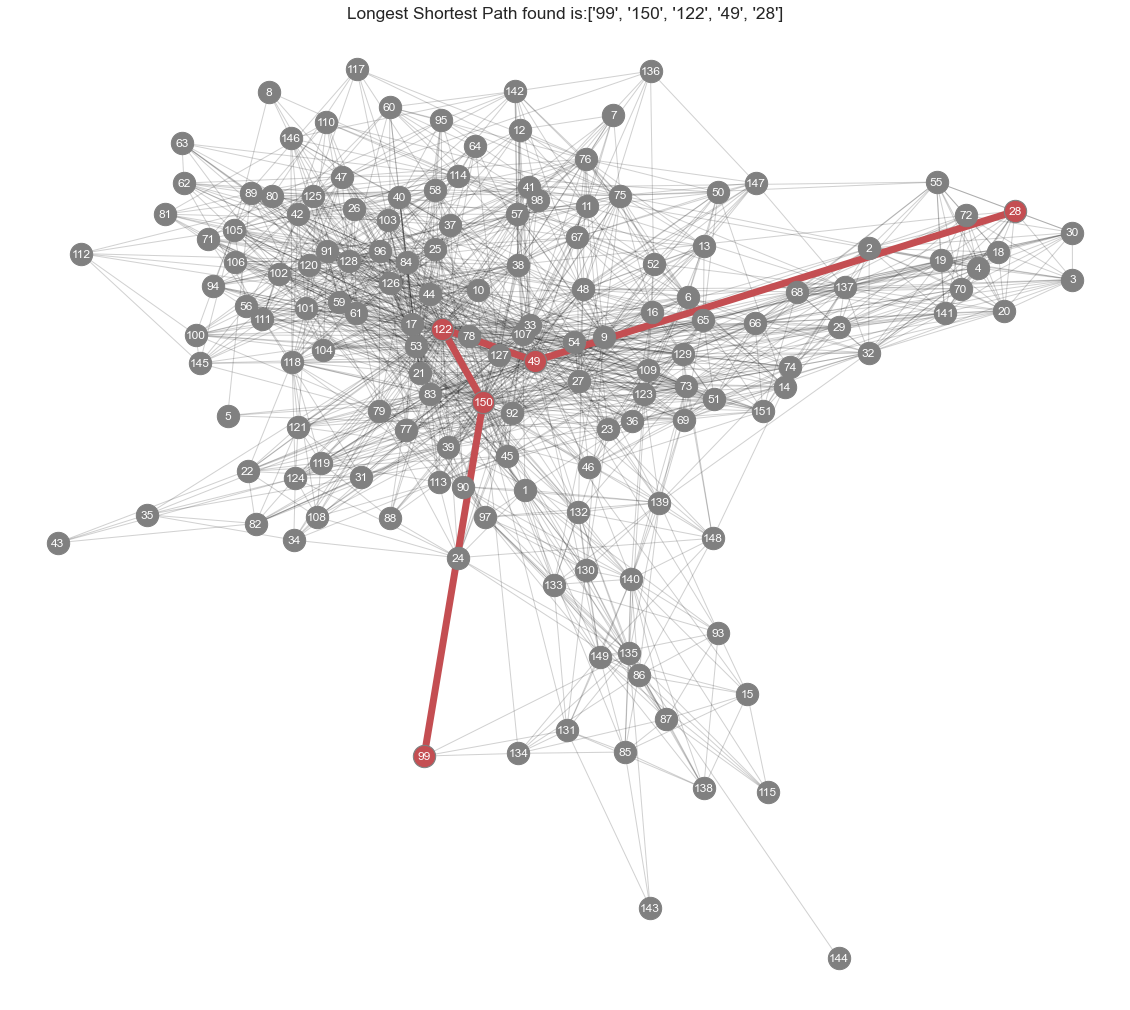

In [162]:
'''
This returns and plots the longest of all of the shortest paths in the graph.
'''
def plot_long_shortest(G):
    longest_path = []

    f = plt.figure(figsize=(20,18))
    pos = nx.spring_layout(G)
    # Plot the network
    nx.draw_networkx_nodes(G.nodes,pos,node_size=500,node_color='gray')
    nx.draw_networkx_labels(G,pos,font_color='w')
    nx.draw_networkx_edges(G,pos,alpha=0.2)
    # calculate the shortest paths from node to node
    for src_node in G.nodes:
        for dest_node in G.nodes:
            path = nx.shortest_path(G,source=src_node,target=dest_node)
            #If the path is longer than previous shortest paths
            if len(longest_path) <= len(path) :
                longest_path = path
    
    # Plot the  longest shortest edges 
    edges = list(zip(longest_path,longest_path[1:]))
    nx.draw_networkx_nodes(G,pos,nodelist=longest_path,node_color='r',node_size=400)
    nx.draw_networkx_edges(G,pos,edgelist=edges,edge_color='r',width=7)
    plt.title('Longest Shortest Path found is:'+str(longest_path), fontsize='x-large')
    plt.axis('off')
    plt.show()

plot_long_shortest(Gx)

# 3. SI Model
In this section you have to create your functions and you cannot use any pre-written code or python libraries
that perform SI/SIR/SIS simulation. If you will use python libraries that implement SI/SIR models or similar
you will get zero points.
(Note: sampling matters. To run 100 simulations a pc should not take more than 3 minutes. Please select a
correct amount of simulations to validate your analysis.)


## (3.a) SI Model.
Define the function SI_model() that inputs:

* G (Network as networkx)
* initial_infecteds (as list of nodes ID)
* beta (trasmission probability as float)
* t_simulation (simulation iteration time as int)

Output: A dictionary that contains the nodes status at each time steps. In this case the status can be:

* ’S’ as susceptible.
* ’I’ as Infected.

Using the network Gx and beta=0.01, t_simulation=300, initial_infecteds=(list of 3 random nodes)
plot the number of user in each status at each time step of the simulation.

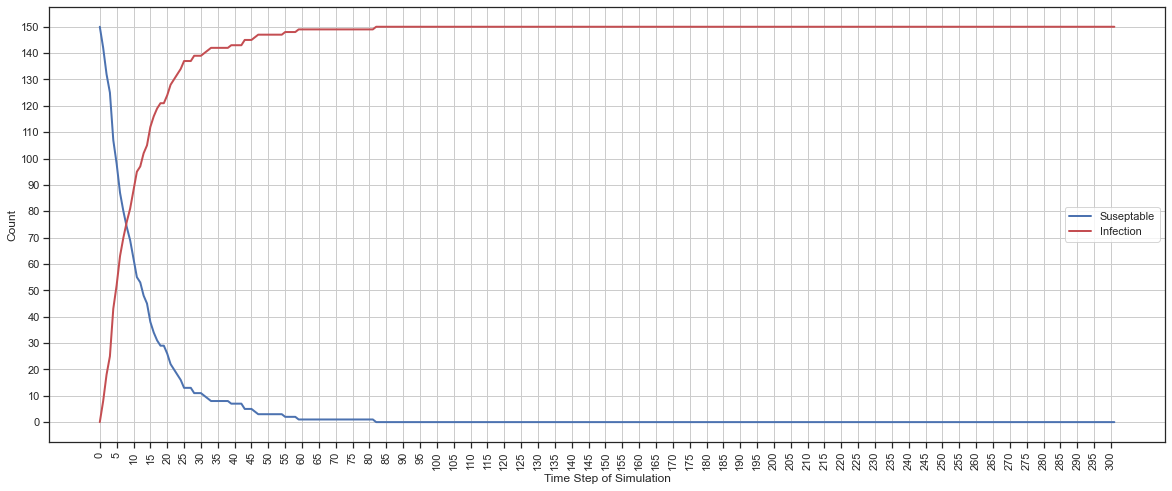

In [19]:
# 3. SI Model
def SI_model(G,initial_infecteds,beta,t_simulation):
    simulation_result,current_simulation = {},0
    #Initial Susceptible nodes
    nodes = np.array([int(node) for node in G.nodes])
    nodes_status = np.full(len(nodes),'S')
    simulation_result[current_simulation] = nodes_status.copy()
    # initial infection
    initial_infecteds = np.array(initial_infecteds).astype(int)
    nodes_status[np.in1d(nodes, initial_infecteds).nonzero()[0]] = 'I'

    while current_simulation <= t_simulation:
        # infect the nodes based on the beta and neighbor nodes
        nodes_status = infectNodes(nodes,nodes_status,getSusceptibleNeighborNodes(G,nodes[nodes_status=='I']),beta)
        current_simulation += 1
        # store simulation result
        simulation_result[current_simulation] = nodes_status.copy()
    return simulation_result

def getSusceptibleNeighborNodes(G,I,R=[]):
    Neighbor_S = set()
    for node in G.nodes: 
        if int(node) in I:
            for n_s in nx.all_neighbors(G,node):
                if int(n_s) not in I and int(n_s) not in R:
                    Neighbor_S.add(int(n_s))
    return Neighbor_S

def infectNodes(nodes,nodes_status,neighbor_s,beta):
    if len(neighbor_s) > 0:
        for neighbor in neighbor_s:
            new_Infection = np.random.choice([True,False],p=[beta,1-beta])
            if new_Infection:
                nodes_status[np.in1d(nodes, neighbor).nonzero()[0]] = 'I'
    return nodes_status

def plotChart(simulation_result,model='SI'):
    step = []
    S = []
    I = []
    R = []
    for simulation_step in simulation_result:
        step.append(simulation_step)
        S.append(len(simulation_result[simulation_step][simulation_result[simulation_step]=='S']))
        I.append(len(simulation_result[simulation_step][simulation_result[simulation_step]=='I']))
        R.append(len(simulation_result[simulation_step][simulation_result[simulation_step]=='R']))
    fig = plt.figure(figsize=(20,8))
    ax = fig.gca()
    ax.set_xticks(np.arange(0, len(simulation_result)+1, 5))
    ax.set_yticks(np.arange(0, len(simulation_result[0])+1, 10))
    plt.xticks(rotation=90)
    plt.xlabel('Time Step of Simulation')
    plt.ylabel('Count')
    plt.plot(step,S,label='Suseptable',color='b',linewidth='2')
    plt.plot(step,I,label='Infection',color='r',linewidth='2')
    if 'R' in model:
        plt.plot(step,R,'-.',label='Recovery',color='g',linewidth='2')
    if 'RS' in model:
        plt.plot(step,S,':',label='S',color='g',linewidth='2')
    plt.grid()
    plt.legend()
    plt.show()

plotChart(SI_model(Gx,['1','44','122'],0.1,300),model='SI')


## (3.b) SIR Model.
It has been discovered that infected nodes become immune after a given recovery time. If a node is immune
and it is in contact with the infected node it does not became infected, and it will not spread the infection!
Define the function SIR_model() that inputs:

* G (a Network as networkx)
* initial_infected (nodes that are infected at time=0 as list of nodes ID)
* beta (trasmission probability as float)
* t_simulation (simulation iteration time as int)
* recovery_time (nodes that are vaccinated as list of nodes ID)
* the number of days needed for the recovery.
Output: a dictionary that contains the nodes status at each time steps. In this case the status can be:
* ’S’ as susceptible.
* ’I’ as Infected.
* ’R’ as Recovered.

Using the network Gx and beta=0.005, t_simulation=300, initial_infected=(list of 3 random nodes),
recovery_time=15, plot the number of users in each status at each simulation time step.

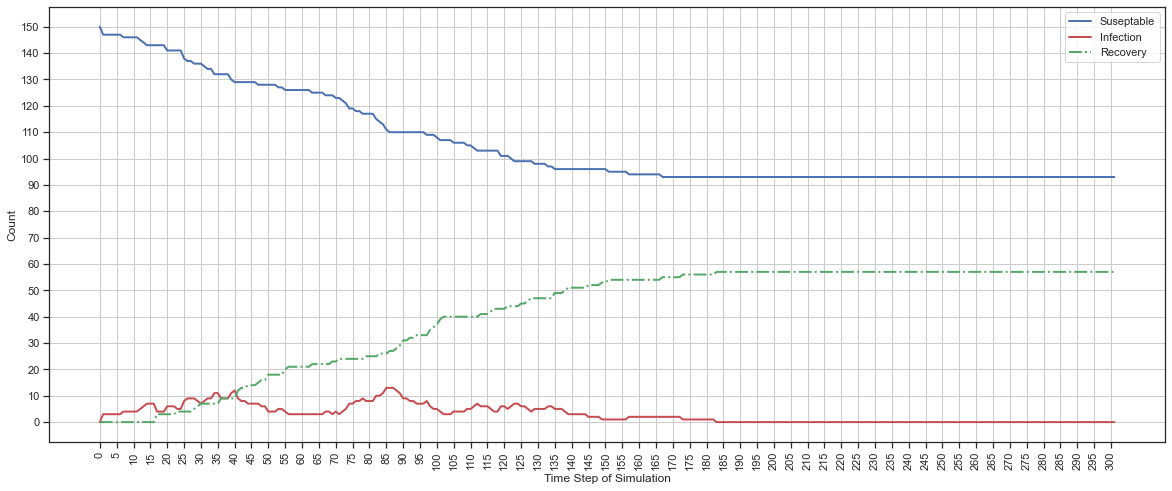

In [50]:
# 4. SIR Model
def SIR_model(G,initial_infecteds,beta,t_simulation,recovery_time):
  
    simulation_result,current_simulation = {},0
    #Initial Susceptible nodes
    nodes = np.array([int(node) for node in G.nodes])
    nodes_status = np.full(len(nodes),'S')
    simulation_result[current_simulation] = nodes_status.copy()

    # initial infection
    initial_infecteds = np.array(initial_infecteds).astype(int)
    nodes_status[np.in1d(nodes, initial_infecteds).nonzero()[0]] = 'I'

    while current_simulation <= t_simulation:
        # infect the nodes based on the beta and neighbor nodes
        nodes_status = infectNodes(nodes,nodes_status,getSusceptibleNeighborNodes(G,nodes[nodes_status=='I'],nodes[nodes_status=='R']),beta)
        #Recovery of the nodes logic
        if current_simulation - recovery_time > 0:
            node_status_at_infection_time = simulation_result[current_simulation - recovery_time]
            nodes_status[node_status_at_infection_time == 'I'] = 'R'
        current_simulation += 1
        # store simulation result
        simulation_result[current_simulation] = nodes_status.copy()
    return simulation_result

plotChart(SIR_model(Gx,['25','75','50'],0.005,300,15),model='SIR')

## (3.c) Second Wave.
After 100 days a second wave of the same infection start to spread on your network. Starting from day
100: 30 people get infected randomly in your network. Keep fixed the simulation propose by the SIR Model in
question 3.b. At day 100, randomly add 30 new infections. If a person is infected by the second wave this set
of rules applied:

* if the person was ’S’ it became infected.
* if the person was ’I’ you need to set to zero the recovery time (it will have to wait 15 days to became
immune).
* ’R’ remain recovered and it is immune to the second wave.

This new infection transmits more easily and it has a beta=0.02!

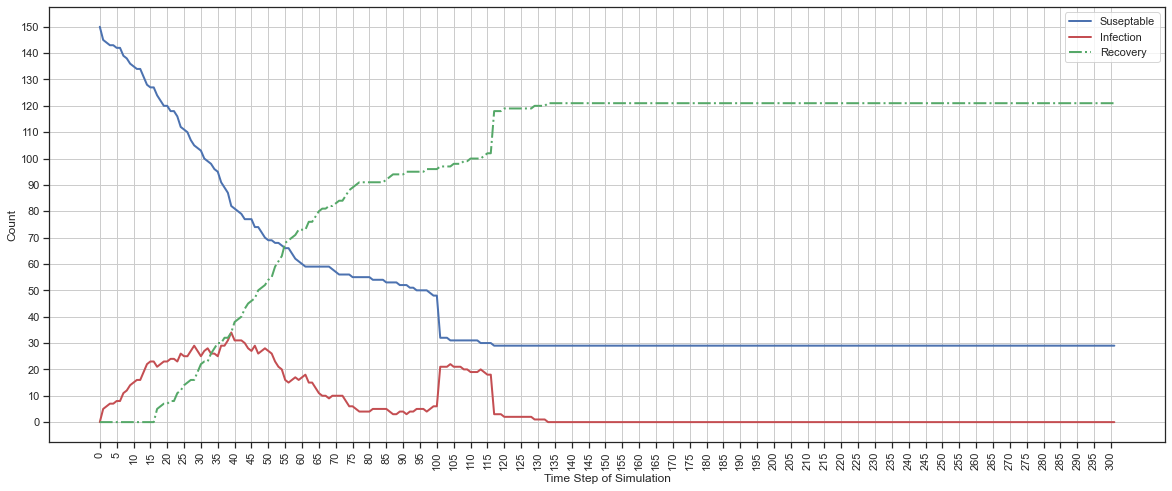

In [45]:
# 4. SIS Model
def SIRS_model(G,initial_infecteds,beta,t_simulation,recovery_time,second_wave_time=100):
    simulation_result,current_simulation,second_wave_infection = {},0,[]
    #Initial Susceptible nodes
    nodes = np.array([int(node) for node in G.nodes])
    nodes_status = np.full(len(nodes),'S')
    simulation_result[current_simulation] = nodes_status.copy()

    # initial infection
    initial_infecteds = np.array(initial_infecteds).astype(int)
    nodes_status[np.in1d(nodes, initial_infecteds).nonzero()[0]] = 'I'

    while current_simulation <= t_simulation:
        #Second wave infection
        if current_simulation == second_wave_time :
            nodes_choosen = nodes[((nodes_status == 'S') | (nodes_status == 'I'))]
            if len(nodes_choosen) > 0:
                second_wave_infection = np.random.choice(nodes_choosen,30)
                nodes_status[np.in1d(nodes, second_wave_infection).nonzero()[0]] = 'I'
        # infect the nodes based on the beta and neighbor nodes
        nodes_status = infectNodes(nodes,nodes_status,getSusceptibleNeighborNodes(G,nodes[nodes_status=='I'],nodes[nodes_status=='R']),beta)

        #Recovery of the nodes logic
        if current_simulation - recovery_time > 0:
            node_status_at_infection_time = simulation_result[current_simulation - recovery_time]
            nodes_status[node_status_at_infection_time == 'I'] = 'R'
        current_simulation += 1
        # store simulation result
        simulation_result[current_simulation] = nodes_status.copy()
    return simulation_result

plotChart(SIRS_model(Gx,['5','10','50'],0.02,300,15),model='SIR')

## (3.d) Remarks.
Plot all the simulations together and make your final remarks on the simulation result of SI, SIR and Second
Wave. How does the second wave affect your population? Please discuss this in your writing.

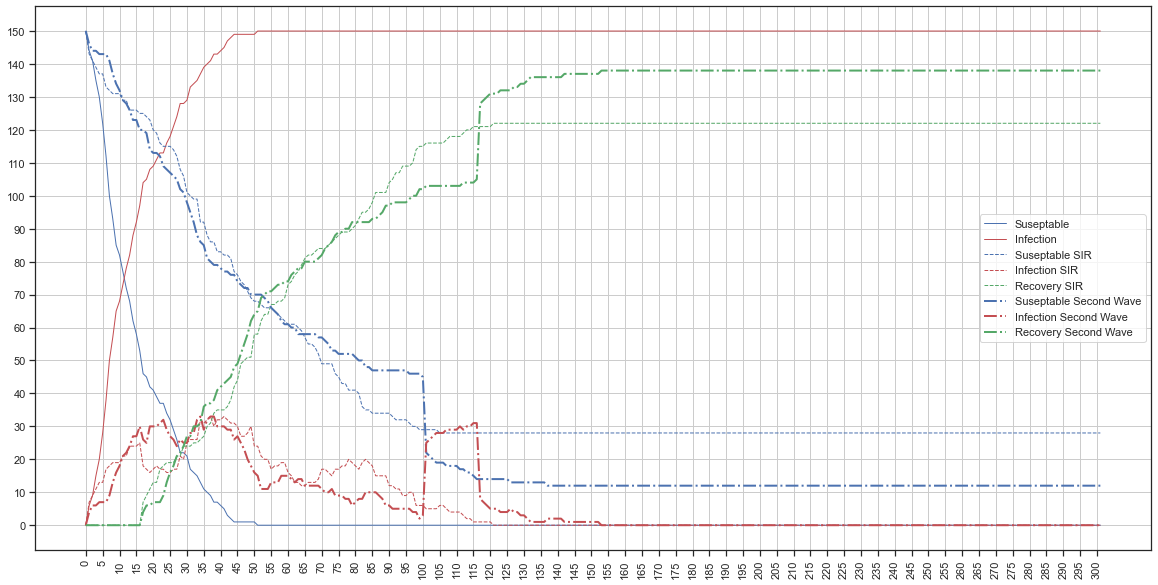

In [97]:
'''
    This method does the simulation of the whole method
'''
def plotChartAllSimulations():
    # below code gets the result from execution of SI,SIR, Second wave model
    result = SI_model(Gx,['5','10','50'],0.08,300)
    result1 = SIR_model(Gx,['5','10','50'],0.02,300,15)
    result2 = SIRS_model(Gx,['5','10','50'],0.02,300,15)
    step = []
    SI,II = [],[]
    SR,IR,RR = [],[],[]
    SRS, IRS, RRS = [],[],[]
    # Preparing the result for ploting
    for simulation_step in result:
        step.append(simulation_step)
        SI.append(len(result[simulation_step][result[simulation_step]=='S']))
        II.append(len(result[simulation_step][result[simulation_step]=='I']))

        SR.append(len(result1[simulation_step][result1[simulation_step]=='S']))
        IR.append(len(result1[simulation_step][result1[simulation_step]=='I']))
        RR.append(len(result1[simulation_step][result1[simulation_step]=='R']))

        SRS.append(len(result2[simulation_step][result2[simulation_step]=='S']))
        IRS.append(len(result2[simulation_step][result2[simulation_step]=='I']))
        RRS.append(len(result2[simulation_step][result2[simulation_step]=='R']))

    # Plot the results
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca()
    ax.set_xticks(np.arange(0, len(result)+1, 5))
    ax.set_yticks(np.arange(0, len(result[0])+1, 10))
    plt.xticks(rotation=90)
    
    #Plot the chart for SI, SIR, SIS according to  result
    plt.plot(step,SI,label='Suseptable',color='b',linewidth='1')
    plt.plot(step,II,label='Infection',color='r',linewidth='1')

    plt.plot(step,SR,'--',label='Suseptable SIR',color='b',linewidth='1')
    plt.plot(step,IR,'--',label='Infection SIR',color='r',linewidth='1')
    plt.plot(step,RR,'--',label='Recovery SIR',color='g',linewidth='1')

    plt.plot(step,SRS,'-.',label='Suseptable Second Wave',color='b',linewidth='2')
    plt.plot(step,IRS,'-.',label='Infection Second Wave',color='r',linewidth='2')
    plt.plot(step,RRS,'-.',label='Recovery Second Wave',color='g',linewidth='2')

    plt.grid()
    plt.legend()
    plt.show()

plotChartAllSimulations()

Please find my remarks on all 3 models as follows:

**SI Model**: This is the basic model of all disease models; This has only below two states:

* Susceptible
* Infection

In this model, the infected person has the highest **probability(beta)** to spread the disease to the neighbouring susceptible node. According to the model, once the node is infected, it will move from susceptible to infected state, and it will **never go back to the susceptible state in the lifecycle**. It will spread the infection to the other susceptible nodes until no susceptible nodes are available to get infected. We can clearly visualize from the above SI model graph that the susceptible count decreases as infection increases. Cytomegalovirus(CMV) or Herpes are examples of the above model.

**SIR Model**: This is one of the important forms of disease models; This has below three states:

* Susceptible
* Infection
* Recovery

In this model, the infected person has the highest **probability(beta)** to spread the disease to the neighbouring susceptible node. According to the model, once the node is infected, it will move from susceptible to infected state, and here there is a possibility of the nodes going back to the susceptible state. 
We should remember that the infected node can only infect the susceptible node and not infect the recovered node. So the **person who is infected once is immune to the infection**.
There is a parameter called **recovery time**, after which the node will recover and move to the recovery state from the infection state. 
From the plot, we can see that as the infection increases, the susceptible count decreases. Once the recovery starts, we can see that there is a decline in the current infection count.

**Second Wave**: This is a special case of the SIR model specified above. This model has a similar number of the states as SIR model. 
In this model, we have simulated a second wave after 100 days of the first infection which would infect the susceptible and infected nodes based on the rule specified in the question. We can see the 
* **spike in the infection around the 100th day, and at the same time, we can see a sudden decline in the susceptible count**. This is because of the second wave, where 30 random nodes were infected. 
* In another 15 days(recovery time), we see a **noticeable jump in the recovered population and a sudden drop in the infected population**. Nodes infected due to the second wave on the 100th day were recovered on the 115th day. 

All of the other rule of the SIR remains in place for this model as well. One of the real-world cases for the above model is covid 19 infectiton. We saw a sudden spike in the covid infections during Oct 2020 after the decline in Jun 2020. We can also see the increased recovery number after 15 days of infection.